In [1]:
import numpy as np
import librosa
import librosa.display as display
import matplotlib.pyplot as plt
import sklearn
import IPython

path to audio file

In [100]:
joel,sr = librosa.load("/mnt/data/datasets/medleyDB/V1/LizNelson_Rainfall/LizNelson_Rainfall_MIX.wav")

In [101]:
joel = joel[10*sr:(40)*sr]

In [102]:
IPython.display.Audio(data=joel,rate=sr)

Window size = 100 ms for stft

In [103]:
stft = librosa.stft(joel,n_fft = int(0.1*sr),hop_length=256)

In [104]:
mag,ph = librosa.magphase(stft)

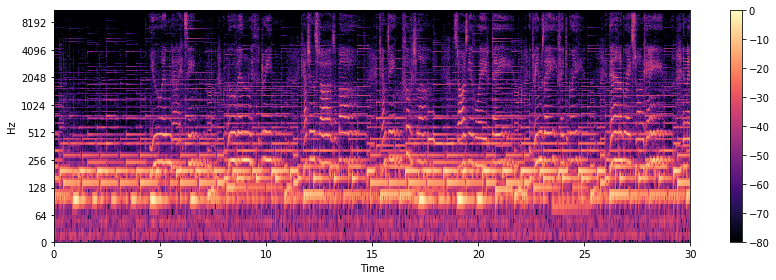

In [105]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(mag, ref=np.max),
                           y_axis='log',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

power spectrum

In [106]:
psd = np.abs(mag)**2

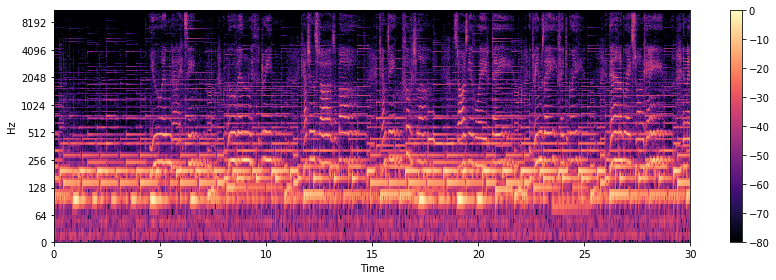

In [107]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(psd, ref=np.max),
                          y_axis='log', x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [108]:
psd.shape

(1103, 2584)

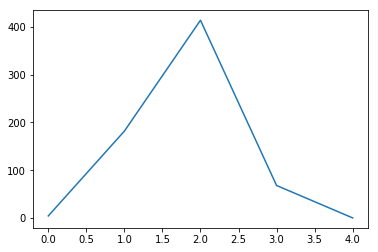

In [109]:
vv=psd[:,int(2584*5/30)]
plt.plot(vv[48:53])
plt.show()

In [58]:
width = 4 * 10 #hz
var = 10**2 #hz square

In [17]:
time_bins = mag.shape[1]
freq_bins = mag.shape[0]

In [3]:
stuff = np.load('stuff.npz')


WF0 = stuff['arr_0']
WGAMMA = stuff['arr_1']
HGAMMA = stuff['arr_2']
HPHI = stuff['arr_3']
WM = stuff['arr_4']
HF0 = stuff['arr_5']
HM = stuff['arr_6']
SX = stuff['arr_7']

Create WF0

In [36]:
Ust = 5
F = psd.shape[0]
Fmin = librosa.note_to_hz('C2')
Fmax = librosa.note_to_hz('C7')
#Fmax = 20000

In [37]:
U = int(np.log2(Fmax/Fmin) * 12*Ust +1)

In [59]:
def gaussian(x, mu=0, var=1):
    return np.exp(-np.power(x - mu, 2.) / (2 * var))

In [39]:
freq=librosa.fft_frequencies(sr,0.1*sr)
freq.shape

(1103,)

In [40]:
Wf0 = np.zeros([F,U])

In [41]:
def uf(u,Fmin,Ust):
    return Fmin * np.power(2,(u)/(12*Ust))

In [43]:
u = np.arange(U)
uf0 = uf(u,Fmin,Ust)

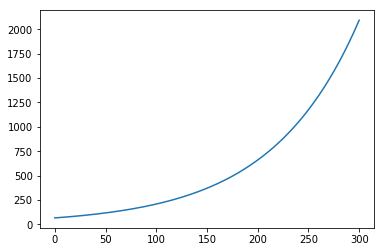

In [46]:
plt.plot(uf0)

In [69]:
j=0
Wf0 = np.zeros([F,U])
for f0 in uf0:
    f=0
    while f <= freq[freq.shape[0]-1]:
        f = f + f0
        for i in range(F):
            x = freq[i]
            Wf0[i,j] = Wf0[i,j] + gaussian(x,f,var)
    j=j+1

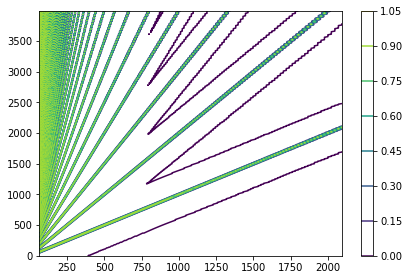

In [70]:
plt.contour(uf0,freq[:400],Wf0[:400,:])
plt.colorbar()
plt.tight_layout()

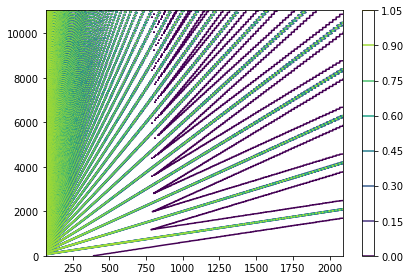

In [71]:
plt.contour(uf0,freq,Wf0)
plt.colorbar()
plt.tight_layout()

In [72]:
Wf02 = np.copy(Wf0)
for i in range(freq.shape[0]):
    for j in range(uf0.shape[0]):
        if Wf02[i][j] <0.00001:
            Wf02[i][j] = 0

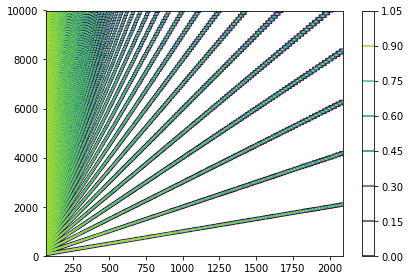

In [73]:
plt.contour(uf0,freq[:1000],Wf02[:1000,:])
plt.colorbar()
plt.tight_layout()

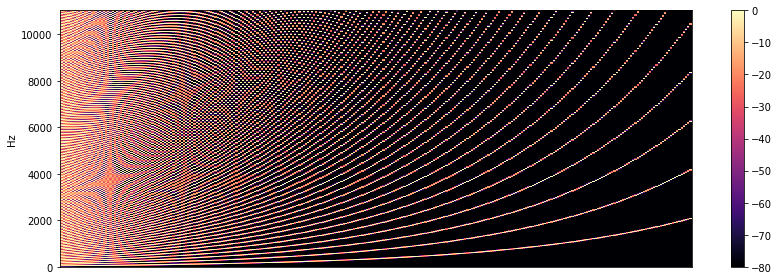

In [74]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(Wf0,ref = np.max),y_axis='linear',
                           sr=sr)
plt.colorbar()
plt.tight_layout()

In [75]:
np.savez('WF0.npz',Wf0)
#Wf0 = Wf0['arr_0']

W_Gamma for the filter

In [130]:
K = 10
P = 30
N = psd.shape[1]

In [124]:
F

1103

In [131]:
W_G = np.zeros([F,P])

In [127]:
def hann(n,m,N):
    return 0.5*(1 - np.cos((2*np.pi*(n-m))/(N-1)))

In [141]:
W_G = np.zeros([F,P])
n=150
m=-125
#s=-125
for i in range(P):
    for j in range(m,n+m):
        if j<1103 and j>-1:
            W_G[j,i] = hann(j,m,n)
    #s = int(s + .25*n)
    m = int(m + .25*n)

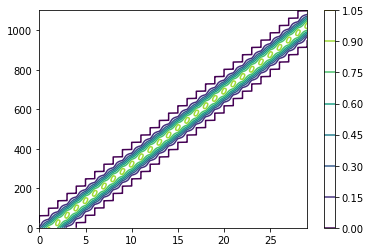

In [142]:
plt.contour(W_G)
plt.colorbar()

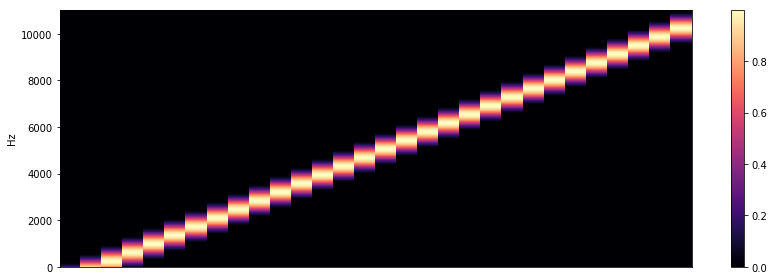

In [143]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(W_G,y_axis='linear',
                           sr=sr)
plt.colorbar()
plt.tight_layout()

In [145]:
Wf0.shape

(1103, 301)

In [144]:
np.savez('Wgamma.npz',W_G)